**Hyper parameter tunning**

- The parameter or arguments of model can change by user to get the good model performance

- Grid search

- Random search

- Assume that in Decision tree we have following hyper parameter

   - criterion : {"gini","entropy","log_loss"}
        
   - splitter : {"best","random"}
            
   - max depth : {1,2,3,4,5,6}  
            
- By default we have criterion gini is there

- But the model might be performance when criterion is 'entropy' also

- we need to test the combination by providing different values

- To try the combination we have two methods

   - Grid search:
        
      - it is a step by step by consider the all combinations
        
      - in criterion: 3, splitter: 2, max depth=6
                
      - The total combination are : 3*2*6=36 
            
   - Random search:
        
      - It Wil not do all 36 possible combiantions
        
      - It will select randomly some combinations
        
- Generally we do Grid search 

- By doing this we have term called Cross validation

**Cross validation**

- Cross validation : CV

- CV=4 means we divide data randomaly in to 4 parts

- Out of these 4 parts every time 3 parts consider as train data, 1 parts consider as test data

- P1 P2 P3 P4 are 4 parts of data

- Combination1: P1 + P2 + P3 are train data and P4 as test data
    
     - For Combination-1 will try to improve model performance by doing Hyper parameter tunning
        
     - Assume there 36 combinations are available in DT
    
     - For the Combination-1 will do all 36

- Combination2: P1 + P2 + P4 are train data and P3 as test data
    
     - For Combination-2 will try to improve model performance by doing Hyper parameter tunning
        
     - Assume there 36 combinations are available in DT
    
     - For the Combination-2 will do all 36

- Combination3: P1 + P2 + P4 are train data and P2 as test data
    
     - For Combination-3 will try to improve model performance by doing Hyper parameter tunning
        
     - Assume there 36 combinations are available in DT
    
     - For the Combination-3 will do all 36

- Combination4: P2 + P3 + P4 are train data and P1 as test data
    
     - For Combination-4 will try to improve model performance by doing Hyper parameter tunning
        
     - Assume there 36 combinations are available in DT
    
     - For the Combination-4 will do all 36
        
- Finally will consider the aaverage of all 4 combinations is the output

- Combination-1 has accuracy-1

- Combination-2 has accuracy-2

- Combination-3 has accuracy-3

- Combination-4 has accuracy-4

- Accuracy= avg(acc1+acc2+acc3+acc4)
        

### Step-1:

#### Read the packages

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)           # To get different different  colors         
pd.set_option('display.max_columns',None) # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Step-2:

### Read the preprocessd data

In [93]:
data=pd.read_csv("preprocessd_data.csv")    
data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


## Step-3:

### Divide data into input and output

In [94]:
# Here the target column is Churn
X = data.drop('churn', axis=1)
y = data['churn']

In [95]:
X.shape, y.shape

((3406, 10), (3406,))

## Step-4:

### Train - Test - Split

In [96]:
# test size=0.2 , train data 80% and test data 20%
# random state=0 will split the data randomly

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2724, 10)
(682, 10)
(2724,)
(682,)


## Step-5

### Read the base model

In [97]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier() # Base model
grid_tree

# Here we not fitting the model


DecisionTreeClassifier()

## Step-6:

### Create the parameter file

In [98]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

- max_depth :
    
   - The maximum depth of tree.

   - If none, then nodes are expanded until all leaves are pure or until all leaves contain less than
     min_sample_split samples

- max_samples_split :
        
   - The minimum number of samples required to split an ineternal mode

- min_samples_leaf :
    
   - The minimum number of samples required to be at a leaf node


In [99]:
# You need to create dictionary with hyper parameters
param_grid = {
    "criterion": ['gini','entropy'], #2
    'max_depth': [3,4,5,6,7,8],      #6
    'min_samples_split': [2,3,4],     #3
    'min_samples_leaf': [1,2,3,4],    #4
    'random_state': [0,42]           #2
}

# 2*6*3*4*2=288

In [100]:
param_grid


{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 4, 5, 6, 7, 8],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3, 4],
 'random_state': [0, 42]}

## Step-7:

### Apply Grid Search CV

In [101]:
# now these parameters to apply in a DT model

grid_search = GridSearchCV(grid_tree,  # Base model
                           param_grid, # params
                           scoring='accuracy', # metric
                           cv=5,
                           verbose=True)



In [102]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [103]:
dir(grid_search)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

## step-8

### Fit the data

In [104]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
# Generally we will pass the entire data
# X_train=input data
# y_train=output data
end=time.time()
print('Total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Total time taken is: 41.722829818725586


### Step-9:

#### Get the best parameters

In [105]:
grid_search.best_estimator_
# Estimator means model : 144 models
# best estimator is your model
# if you use this model
# then we need to find all the metrics

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [106]:
grid_search.best_score_
# not a single accuracy
# avg accuracy of all 5 parts

0.8649001618996222

In [107]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

- Estimator means best Decision Tree Model
- best params means the parameters which are used in best model

In [109]:
grid_search.cv_results_

In [110]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_random_state', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
grid_search.cv_results_['params']

In [111]:
len(grid_search.cv_results_['split0_test_score'])

288

In [112]:
c1=grid_search.cv_results_['split0_test_score']
c2=grid_search.cv_results_['split1_test_score']
c3=grid_search.cv_results_['split2_test_score']
c4=grid_search.cv_results_['split3_test_score']
c5=grid_search.cv_results_['split4_test_score']
mean_score=grid_search.cv_results_['mean_test_score']
df=pd.DataFrame(zip(c1,c2,c3,c4,c5,mean_score),
 index=grid_search.cv_results_['params'],
 columns=['C1','C2','C3','C4','C5','mean_test_score'])
avg=[sum(i[:-1])/5 for i in df.values]
max(avg)
df['Average']=avg
df


,C1,C2,C3,C4,C5,mean_test_score,Average
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
...,...,...,...,...,...,...,...
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}",0.877064,0.871560,0.851376,0.858716,0.845588,0.860861,0.860861
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 0}",0.880734,0.880734,0.849541,0.860550,0.852941,0.864900,0.864900
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 42}",0.877064,0.871560,0.851376,0.858716,0.845588,0.860861,0.860861
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4, 'random_state': 0}",0.880734,0.880734,0.849541,0.860550,0.852941,0.864900,0.864900


In [113]:
df['Average'].max(),grid_search.best_score_


(0.8649001618996222, 0.8649001618996222)

In [114]:
df.values[0][:-1]

array([0.82752294, 0.8293578 , 0.8146789 , 0.82568807, 0.81066176,
       0.82158189])

In [115]:
# Best Parameter
df[['Average']].idxmax().values[0]

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [116]:
id=df[['Average']].idxmax()
id.values

array([{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}],
      dtype=object)

### Cross Validation Score


- Now we use the best model


- Perform the cross validation score


- Best model means it takes the best parameter


- Cross validation 5 means, it gives 5 accuracy values


- Take the average of all accuracy, again that should be equal to best accuracy

In [117]:
# Assume that we already know the best model
# best parameters without doing grid search
# Now I want to apply Cross Validation
# In the cross validation ever part involved in training and testing
# cross_val_score cv=5 by default

In [118]:
accuracy_list=cross_val_score(grid_search.best_estimator_,
                             X_train,y_train,cv=5,
                             scoring='accuracy')
accuracy_list
# it will give each part accuracy
# by using best model (best estimator)

array([0.88073394, 0.88073394, 0.84954128, 0.86055046, 0.85294118])

In [119]:
accuracy_list.mean()

0.8649001618996222

In [120]:
## All together

#================================ Step-1:Get the base model ====================================

from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier() #Base model
DT_params=[keys for keys in grid_tree.get_params()]
print('Available parameters for model:',DT_params)

print("==========================================================================================")
      
#================================= Step-2:Create a dictionary for params ========================
      
param_grid={'criterion':['gini','entropy'],
             'max_depth':[3,4,5,6,7,8],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2,3,4],
             'random_state':[0,42]
}

print('Processing Parameters are :',param_grid)
      
print("==========================================================================================")
      
#=================================== Step-3:Apply the Grid Search ===============================
      
grid_search = GridSearchCV(grid_tree, # Base model
                           param_grid, # params
                           scoring='accuracy', # metrics
                           cv=5,
                            verbose=True)
      
#================================ Step-4:fit the model with train data ==========================
      
grid_search.fit(X_train,y_train)
      
#================================ Step-5:Get the best parameters ================================
      
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print('best params :',best_params)
print('best train accuracy :',best_score)      
      

Available parameters for model: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter']
Processing Parameters are : {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [0, 42]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best params : {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}
best train accuracy : 0.8649001618996222


### Identify the predictions and Metrics by using best parameters


- Out of 1440 fittings, one best fit model is outcome


- Best fit means it will give the best parameters


- For me the best parameter combination is


- entropy


- depth=6


- sample split=2


- random state=0


- Our goal is, by using above parameters we need to find the predictions


- And will evaluate model performance


- Now fit that model with X_train, y_train


- Get the predictions by passing X_test


- Compare the predictions with y_test


- Calculate


- Accuracy


- Precision


- Recall


- f1 score


- Roc - Auc curve

In [121]:
grid_search.best_params_
grid_search.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [122]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',
                               max_depth=8,
                               min_samples_leaf=4,
                               min_samples_split=2,
                               random_state=0)

dtree.fit(X_train, y_train)


    

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

accuracy is : 88.71
f1 score is : 0.88
Precision is : 0.92
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       335
           1       0.92      0.85      0.88       347

    accuracy                           0.89       682
   macro avg       0.89      0.89      0.89       682
weighted avg       0.89      0.89      0.89       682



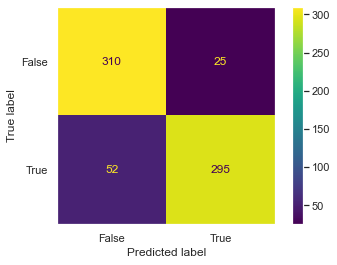

True Negative : 310
False Positive : 25
False Negative : 52
True Positive : 295


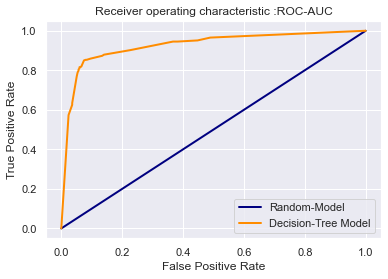

Computed Area Under the Curve (AUC) 0.9253301217256656


In [123]:
from sklearn.tree import DecisionTreeClassifier
#dtree=DecisionTreeClassifier('criterion'= 'entropy',
#                             'max_depth'= 8,
#                             'min_samples_leaf'=4,
# async                            'min_samples_split'=2,
#                             'random_state'=0)
#dtree.fit(X_train,y_train)

#==========================Step-5:Predictions==================================

# y_pred=dtree.predict(X_test)
best_model=grid_search.best_estimator_
y_pred_dt=best_model.predict(X_test)

#==========================Step-6:Metrics=======================================

acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print('accuracy is :',acc_dt)
print('f1 score is :',f1_dt)
print('Precision is :',precision_dt)
print(classification_report(y_test,y_pred_dt))

#===========================Step-7:Confusion Matrx=============================================

cmt=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels=[False,True])

disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print('True Negative :',tn)
print('False Positive :',fp)
print('False Negative :',fn)
print('True Positive :',tp)

#=======================================Step-8: ROC-AUC curve====================================

y_dt_pred_prob=best_model.predict_proba(X_test)[:,1] # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision-Tree Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))


In [124]:
# Decision tree will provide important features also
# Information gain values

dtree.feature_importances_

array([0.00616068, 0.04036772, 0.03495145, 0.10806111, 0.05528092,
       0.30046623, 0.05574218, 0.03249424, 0.0830648 , 0.28341067])

In [125]:
imp_df=pd.DataFrame({
 'Feature Name':X_train.columns,
 'Importance':dtree.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi

# This concept is valid only for DT
# you can use these features top 10 again develop the model
# Dont use these feature in another model

,Feature Name,Importance
5,weekly_mins_watched,0.300466
9,customer_support_calls,0.283411
3,multi_screen,0.108061
8,videos_watched,0.083065
6,minimum_daily_mins,0.055742
4,mail_subscribed,0.055281
1,age,0.040368
2,no_of_days_subscribed,0.034951
7,weekly_max_night_mins,0.032494
0,gender,0.006161
